In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  Imaginability TangibilityCondition
2  AmountDonated Sympathy
3  Impact

forbiddirect
TangibilityCondition Impact

requiredirect
Sympathy TangibilityCondition

#### Load causal algorithms from the py-causal library and Run FGES Continuous

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()

In [6]:
tetrad.listScores()

bdeu-score
cci-score
cg-bic-score
cg-other-bic-score
d-sep-score
disc-bic-score
disc-mixed-bic-score
mnlr-bic-score
mvp-bic-score
sem-bic-score


In [7]:
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'sem-bic-score')

faithfulnessAssumed: This is a parameter for FGES (“Fast GES”). If this is set to ‘Yes’, it will be assumed that if X _||_ Y, by an independence test, then X _||_ Y | Z for nonempty Z. If the model is faithful to the data, this will necessarily be the case. However, there are some non-faithful examples one can propose where this is not the case. If one is worried about this kind of unfaithfulness, one should set this parameter to ‘No’. If one is willing to tolerate this kind of unfaithfulness, then setting this parameter to ‘Yes’ leads to significantly faster searches. (java.lang.Boolean) [default:true]
symmetricFirstStep: For discrete searches, and in some other situations, it may make a difference for an edge X—Y whether you score X->Y or X<-Y, even though theoretically they should have the same score. If this parameter is set to “Yes”, both scores will be calculated and the higher score used. (Recall we are calculating BIC as 2L – c k ln N, where c is the penalty discount.) (java.la

In [8]:
tetrad.run(algoId = 'fges', dfs = df, priorKnowledge = prior,
           maxDegree = -1, faithfulnessAssumed = True, verbose = True)

#### FGES Continuous' Result's Nodes

In [9]:
tetrad.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact']

#### FGES Continuous' Result's Edges

In [10]:
tetrad.getEdges()

['Sympathy --> TangibilityCondition',
 'Sympathy --> Impact',
 'Sympathy --> AmountDonated',
 'Imaginability --> Sympathy',
 'Imaginability --> Impact']

In [11]:
graph = tetrad.getTetradGraph()
print('Graph BIC: {}'.format(graph.getAttribute('BIC')))
nodes = graph.getNodes()
for i in range(nodes.size()):
    node = nodes.get(i)
    print('Node {} BIC: {}'.format(node.getName(),node.getAttribute('BIC')))

Graph BIC: -195.63373963434373
Node TangibilityCondition BIC: 129.3063127682954
Node AmountDonated BIC: -56.6536301194262
Node Sympathy BIC: -120.08704374118994
Node Imaginability BIC: -119.52189972995684
Node Impact BIC: -96.58585937693071


#### Plot The Result's Graph

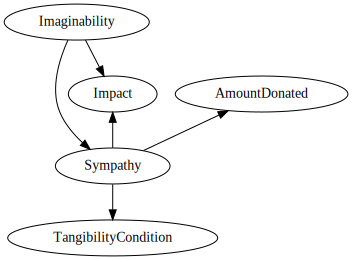

In [12]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [13]:
pc.stop_vm()